In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
import requests

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

626

In [3]:
#Perform API calls
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Get weather data
weather_response = requests.get(query_url)
weather_json = weather_response.json()
print(weather_json)

{'cod': '400', 'message': 'Nothing to geocode'}


In [4]:
#Use a for loop to go through cities
#Use try and except for going through cities
# query_url = url + "appid=" + weather_api_key + "units" + "&q="
query_url = f"{url}appid={weather_api_key}&units={units}&q="

#either make a dictionary to store key(city) and its values
lat = []
long =[]
max_temp = []
humidity = []
cloudiness = []
wind = []
country = []
date = []

city_name = []

for index,city in enumerate(cities):
    #try and except error
    try:
        response = requests.get(query_url + city).json()
        lat.append(response["coord"]["lat"])
        long.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind.append(response["wind"]["speed"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        city_name.append(city)
        print("City number is " + str(index) + " & city name is " + city)
    except:
        print("City not found")

City number is 0 & city name is esperance
City number is 1 & city name is jamestown
City number is 2 & city name is aragarcas
City number is 3 & city name is rikitea
City number is 4 & city name is busselton
City number is 5 & city name is mataura
City number is 6 & city name is muros
City not found
City number is 8 & city name is bobon
City number is 9 & city name is airai
City number is 10 & city name is thompson
City number is 11 & city name is hermanus
City number is 12 & city name is takab
City number is 13 & city name is shache
City number is 14 & city name is caravelas
City number is 15 & city name is dhidhdhoo
City number is 16 & city name is touros
City number is 17 & city name is albany
City number is 18 & city name is codrington
City number is 19 & city name is punta arenas
City number is 20 & city name is bluff
City number is 21 & city name is ofaqim
City number is 22 & city name is hilo
City number is 23 & city name is price
City not found
City number is 25 & city name is 

City number is 202 & city name is bubaque
City number is 203 & city name is cayenne
City number is 204 & city name is kargasok
City number is 205 & city name is parakou
City number is 206 & city name is pangody
City number is 207 & city name is bengkulu
City number is 208 & city name is kaitangata
City number is 209 & city name is rorvik
City number is 210 & city name is asau
City number is 211 & city name is sarangpur
City number is 212 & city name is namatanai
City number is 213 & city name is bluefield
City not found
City number is 215 & city name is monopoli
City number is 216 & city name is sham churasi
City number is 217 & city name is lompoc
City number is 218 & city name is trairi
City number is 219 & city name is monchegorsk
City number is 220 & city name is awka
City number is 221 & city name is talnakh
City number is 222 & city name is san pedro
City number is 223 & city name is guerrero negro
City number is 224 & city name is oyama
City number is 225 & city name is fortuna


City number is 397 & city name is chimoio
City number is 398 & city name is susanville
City number is 399 & city name is liverpool
City number is 400 & city name is fort-shevchenko
City number is 401 & city name is amapa
City number is 402 & city name is ikalamavony
City number is 403 & city name is kambove
City number is 404 & city name is serenje
City number is 405 & city name is monroe
City number is 406 & city name is narsaq
City number is 407 & city name is santiago
City number is 408 & city name is takoradi
City number is 409 & city name is victoria point
City number is 410 & city name is keta
City number is 411 & city name is samarai
City number is 412 & city name is wagar
City number is 413 & city name is faya
City number is 414 & city name is mulege
City number is 415 & city name is heihe
City number is 416 & city name is henties bay
City number is 417 & city name is chimbarongo
City number is 418 & city name is beringovskiy
City number is 419 & city name is lima
City number i

City number is 601 & city name is haines junction
City number is 602 & city name is ballina
City number is 603 & city name is kikinda
City number is 604 & city name is kirkwall
City number is 605 & city name is matay
City number is 606 & city name is aginskoye
City number is 607 & city name is natalio
City not found
City number is 609 & city name is gizo
City number is 610 & city name is punta cardon
City number is 611 & city name is tessalit
City number is 612 & city name is nekhayevskiy
City number is 613 & city name is hofn
City number is 614 & city name is nakamura
City number is 615 & city name is cabedelo
City number is 616 & city name is chicama
City number is 617 & city name is mount isa
City number is 618 & city name is baisha
City number is 619 & city name is usinsk
City number is 620 & city name is hamilton
City number is 621 & city name is liepaja
City not found
City number is 623 & city name is konya
City number is 624 & city name is garissa
City number is 625 & city name 

In [5]:
#Create DataFrame
weather_df = pd.DataFrame({"City": city_name, "Lat": lat, "Lng": long,
                           "Max Temp": max_temp, "Humidity": humidity,
                           "Cloudiness": cloudiness, "Wind Speed": wind,
                           "Country": country, "Date": date})
weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,esperance,-33.87,121.90,9.00,100,75,2.60,AU,1596485797
1,jamestown,42.10,-79.24,24.00,64,40,5.70,US,1596485745
2,aragarcas,-15.90,-52.25,31.93,21,0,2.06,BR,1596486007
3,rikitea,-23.12,-134.97,23.10,82,30,8.15,PF,1596485889
4,busselton,-33.65,115.33,8.33,84,45,5.80,AU,1596485889
...,...,...,...,...,...,...,...,...,...
576,hamilton,39.18,-84.53,28.89,54,40,1.50,US,1596485893
577,liepaja,56.54,21.04,17.00,93,100,0.92,LV,1596486072
578,konya,38.17,32.50,21.00,32,0,2.10,TR,1596486072
579,garissa,-0.45,39.64,24.50,60,42,9.90,KE,1596486072


In [6]:
#Check which cities have humidity > 100%
humidity_df = weather_df.loc[weather_df["Humidity"] > 100]
humidity_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


There are no cities with humidity > 100%.

In [7]:
#Export DataFrame to CSV
weather_df.to_csv("output_data/cities.csv")

# Latitude vs. Temperature Plot

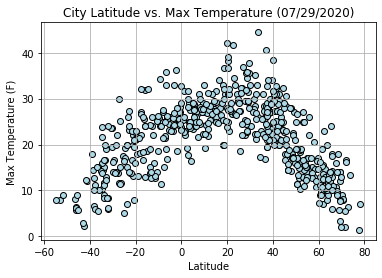

In [8]:
x = lat
y = max_temp

plt.scatter(lat, max_temp, marker="o", facecolors="lightblue", edgecolors="black")

#Add title and other labels
plt.title("City Latitude vs. Max Temperature (07/29/2020)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.savefig("output_data/Lat_Temp_Plot.png")
plt.show()

The Latitude vs. Temperature plot shows...

# Latitude vs. Humidity Plot

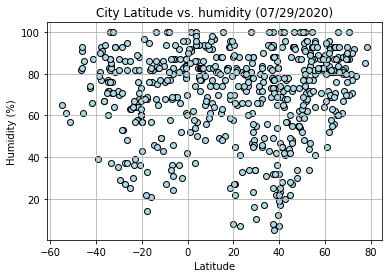

In [9]:
x = lat
y = humidity

plt.scatter(lat, humidity, marker="o", facecolors="lightblue", edgecolors="black")

#Add title and other labels
plt.title("City Latitude vs. humidity (07/29/2020)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.savefig("output_data/Lat_Humidity_Plot.png")
plt.show()

The Latitude vs. Humidity plot shows ...

# Latitude vs. Cloudiness Plot

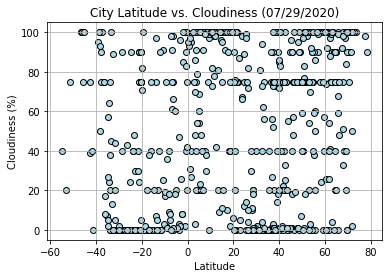

In [10]:
x = lat
y = cloudiness

plt.scatter(lat, cloudiness, marker="o", facecolors="lightblue", edgecolors="black")

#Add title and other labels
plt.title("City Latitude vs. Cloudiness (07/29/2020)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.savefig("output_data/Lat_Cloudiness_Plot.png")
plt.show()

The Latitude vs. Cloudiness plot shows...

# Latitude vs. Wind Speed Plot

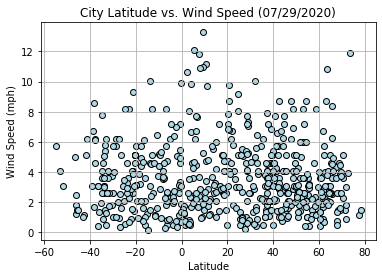

In [11]:
x = lat
y = wind

plt.scatter(lat, wind, marker="o", facecolors="lightblue", edgecolors="black")

#Add title and other labels
plt.title("City Latitude vs. Wind Speed (07/29/2020)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.savefig("output_data/Lat_Wind_Plot.png")
plt.show()

The Latitude vs. Wind Speed plot shows...

# LINEAR REGRESSIONS

In [12]:
#Create Northern Hemisphere DataFrames
northern_df = weather_df.loc[weather_df["Lat"] >= 0]
northern_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,jamestown,42.10,-79.24,24.00,64,40,5.70,US,1596485745
6,muros,42.78,-9.06,21.11,77,75,3.60,ES,1596485894
7,bobon,12.52,124.56,25.30,88,42,1.23,PH,1596486008
9,thompson,55.74,-97.86,26.00,41,20,3.10,CA,1596485734
11,takab,36.40,47.11,16.81,69,0,2.29,IR,1596486008
...,...,...,...,...,...,...,...,...,...
575,usinsk,65.99,57.53,10.05,93,48,4.94,RU,1596486071
576,hamilton,39.18,-84.53,28.89,54,40,1.50,US,1596485893
577,liepaja,56.54,21.04,17.00,93,100,0.92,LV,1596486072
578,konya,38.17,32.50,21.00,32,0,2.10,TR,1596486072


In [13]:
#Create Southern Hemisphere DataFrames
southern_df = weather_df.loc[weather_df["Lat"] <= 0]
southern_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,esperance,-33.87,121.90,9.00,100,75,2.60,AU,1596485797
2,aragarcas,-15.90,-52.25,31.93,21,0,2.06,BR,1596486007
3,rikitea,-23.12,-134.97,23.10,82,30,8.15,PF,1596485889
4,busselton,-33.65,115.33,8.33,84,45,5.80,AU,1596485889
5,mataura,-46.19,168.86,5.77,91,100,1.24,NZ,1596485888
...,...,...,...,...,...,...,...,...,...
565,gizo,-8.10,156.84,27.54,81,18,3.65,SB,1596486070
571,cabedelo,-6.98,-34.83,25.00,69,91,8.20,BR,1596485681
572,chicama,-7.84,-79.15,21.48,58,8,4.59,PE,1596486071
573,mount isa,-20.73,139.50,8.00,36,0,3.07,AU,1596485732


# Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.4945530607146859


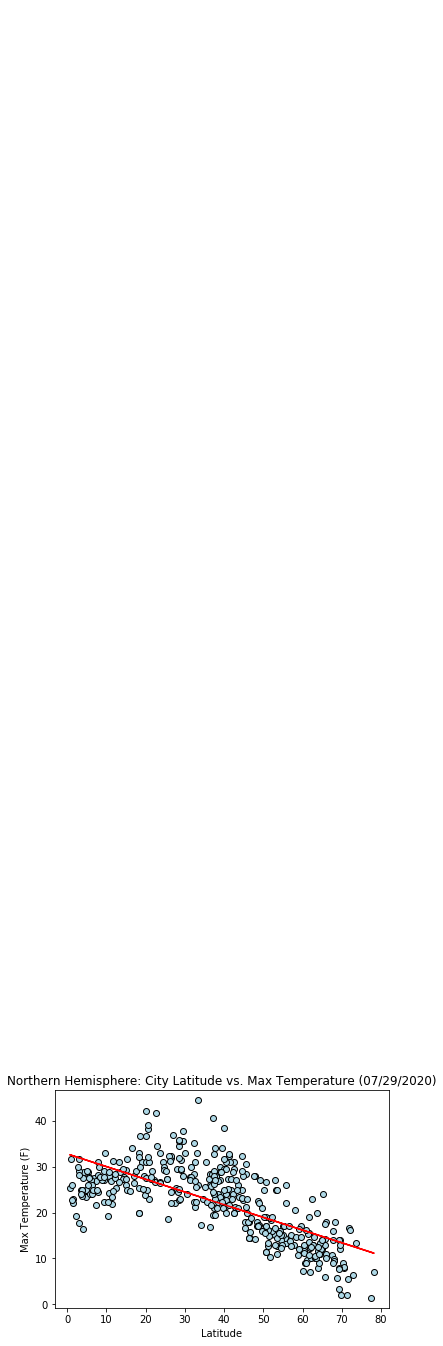

In [14]:
x_values = northern_df["Lat"]
y_values = northern_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values, marker="o", facecolors="lightblue", edgecolors="black")

plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(0,280),fontsize=15,color="red") 

#Add title and other labels
plt.title("Northern Hemisphere: City Latitude vs. Max Temperature (07/29/2020)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

# Print out the r-squared value along with the plot.
print(f"The r-squared is: {rvalue**2}")

# Show and save plot
plt.savefig("output_data/North_Lat_Temp_Plot.png")
plt.show()

# Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5061510539426256


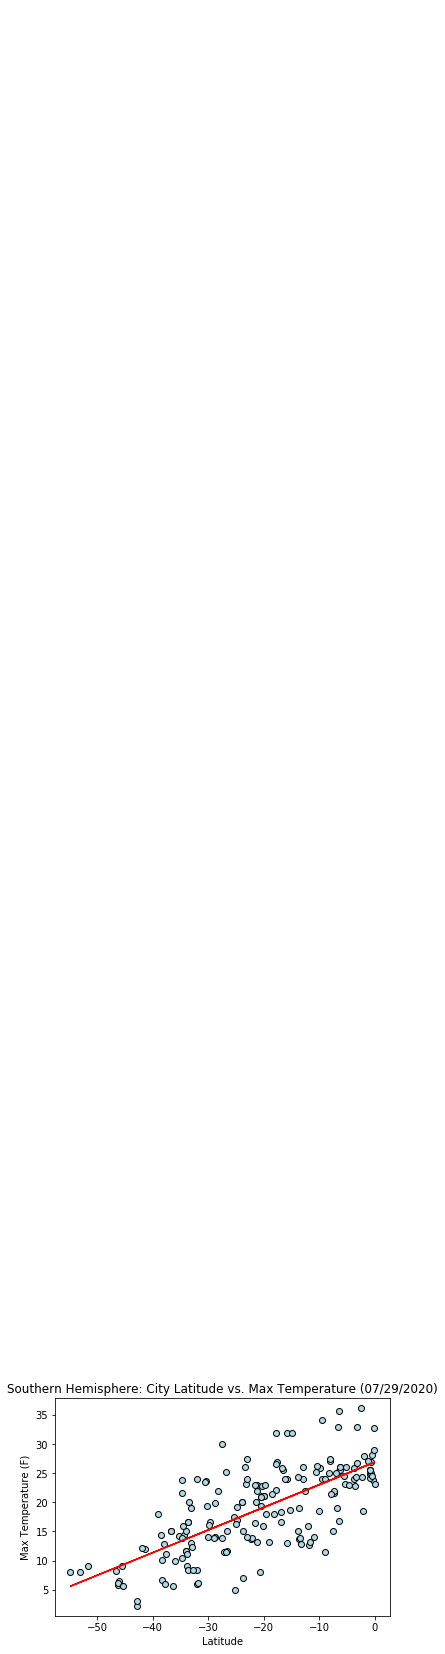

In [15]:
x_values = southern_df["Lat"]
y_values = southern_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values, marker="o", facecolors="lightblue", edgecolors="black")

plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(-30,275),fontsize=15,color="red")

#Add title and other labels
plt.title("Southern Hemisphere: City Latitude vs. Max Temperature (07/29/2020)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

# Print out the r-squared value along with the plot.
print(f"The r-squared is: {rvalue**2}")

# Show and save plot
plt.savefig("output_data/South_Lat_Temp_Plot.png")
plt.show()

# Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.00516488054276298


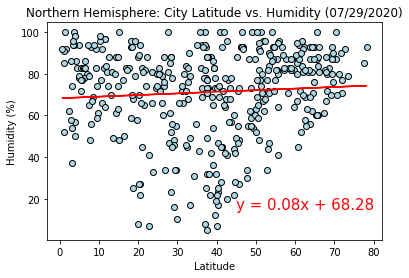

In [16]:
x_values = northern_df["Lat"]
y_values = northern_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values, marker="o", facecolors="lightblue", edgecolors="black")

plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(45,15),fontsize=15,color="red")

#Add title and other labels
plt.title("Northern Hemisphere: City Latitude vs. Humidity (07/29/2020)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Print out the r-squared value along with the plot.
print(f"The r-squared is: {rvalue**2}")

# Show and save plot
plt.savefig("output_data/North_Lat_Humidity_Plot.png")
plt.show()

# Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0029504451319869625


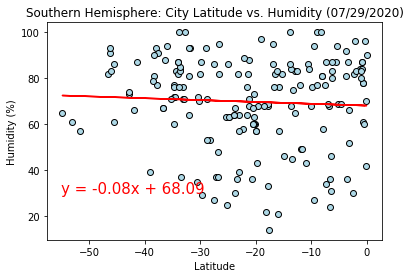

In [17]:
x_values = southern_df["Lat"]
y_values = southern_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values, marker="o", facecolors="lightblue", edgecolors="black")

plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(-55,30),fontsize=15,color="red")

#Add title and other labels
plt.title("Southern Hemisphere: City Latitude vs. Humidity (07/29/2020)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Print out the r-squared value along with the plot.
print(f"The r-squared is: {rvalue**2}")

# Show and save plot
plt.savefig("output_data/South_Lat_Humidity_Plot.png")
plt.show()

# Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0011132230320533899


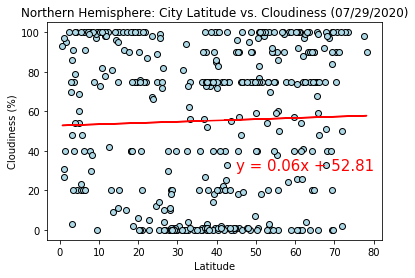

In [18]:
x_values = northern_df["Lat"]
y_values = northern_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values, marker="o", facecolors="lightblue", edgecolors="black")

plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(45,30),fontsize=15,color="red")

#Add title and other labels
plt.title("Northern Hemisphere: City Latitude vs. Cloudiness (07/29/2020)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Print out the r-squared value along with the plot.
print(f"The r-squared is: {rvalue**2}")

# Show and save plot
plt.savefig("output_data/North_Lat_Cloudiness_Plot.png")
plt.show()

# Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 9.447079201135743e-05


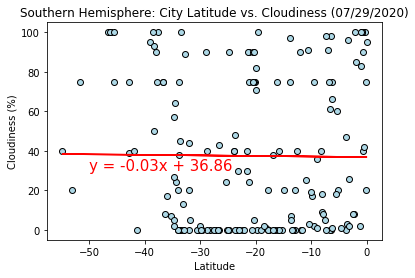

In [19]:
x_values = southern_df["Lat"]
y_values = southern_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values, marker="o", facecolors="lightblue", edgecolors="black")

plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(-50,30),fontsize=15,color="red")

#Add title and other labels
plt.title("Southern Hemisphere: City Latitude vs. Cloudiness (07/29/2020)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Print out the r-squared value along with the plot.
print(f"The r-squared is: {rvalue**2}")

# Show and save plot
plt.savefig("output_data/South_Lat_Cloudiness_Plot.png")
plt.show()

# Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.01725757880653336


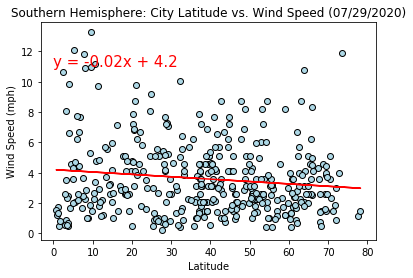

In [20]:
x_values = northern_df["Lat"]
y_values = northern_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values, marker="o", facecolors="lightblue", edgecolors="black")

plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(0,11),fontsize=15,color="red")

#Add title and other labels
plt.title("Southern Hemisphere: City Latitude vs. Wind Speed (07/29/2020)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Print out the r-squared value along with the plot.
print(f"The r-squared is: {rvalue**2}")

# Show and save plot
plt.savefig("output_data/North_Lat_Wind_Plot.png")
plt.show()

# Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 8.062100077957272e-06


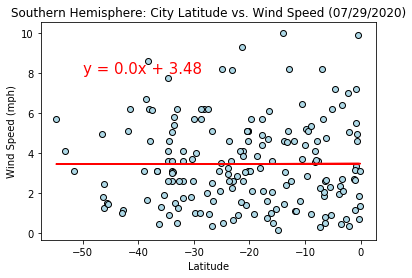

In [21]:
x_values = southern_df["Lat"]
y_values = southern_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values, marker="o", facecolors="lightblue", edgecolors="black")

plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(-50,8),fontsize=15,color="red")

#Add title and other labels
plt.title("Southern Hemisphere: City Latitude vs. Wind Speed (07/29/2020)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Print out the r-squared value along with the plot.
print(f"The r-squared is: {rvalue**2}")

# Show and save plot
plt.savefig("output_data/South_Lat_Wind_Plot.png")
plt.show()